In [ ]:
!pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Bringing in the Decision Tree 


In [ ]:
import numpy as np
import pandas as pd
import tensorflow_decision_forests as tfdf
import seaborn as sns
import matplotlib.pyplot as plt

importing things 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd

df =pd.read_csv("drive/My Drive/nba_data/nba_data_sac.csv")
df.head()

,Season,Tm,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2009-10,SAC,38.3,84.1,0.456,5.9,16.9,0.349,17.4,24.0,0.726,11.9,30.7,42.6,20.5,6.9,4.5,15.0,22.3,100.0
1,2009-10,LAL,38.3,83.8,0.457,6.5,19.0,0.341,18.5,24.2,0.765,11.9,32.5,44.3,21.1,7.5,4.9,13.4,19.4,101.7
2,2009-10,LAC,36.6,80.5,0.455,5.9,17.8,0.332,16.6,22.8,0.730,11.3,30.5,41.8,22.1,6.5,5.7,15.7,19.3,95.7
3,2009-10,DAL,38.3,82.4,0.464,6.8,18.3,0.372,18.6,22.8,0.816,10.2,31.5,41.7,23.4,7.6,5.5,12.9,19.1,102.0
4,2009-10,OKC,37.4,80.8,0.462,5.1,15.0,0.340,21.7,27.0,0.805,11.7,31.8,43.5,20.0,8.0,5.9,15.0,21.3,101.5


NOTE: the dataset may be named after sactown but it contains all the teams in the league


In [ ]:
label = "Tm"

classes = list(df[label].unique())
print(f"Label classes: {classes}")
# >> Label classes: team names come on now playa

df[label] = df[label].map(classes.index)

Label classes: ['SAC', 'LAL', 'LAC', 'DAL', 'OKC', 'POR', 'GSW', 'PHO', 'MIN', 'NOP', 'UTA', 'DEN', 'MEM', 'SAS', 'HOU', 'BRK', 'PHI', 'NYK', 'TOR', 'MIL', 'BOS', 'CLE', 'IND', 'CHI', 'DET', 'MIA', 'ATL', 'ORL', 'CHO', 'WAS']


labelling the classes for processing

In [ ]:
df.corr()

,Tm,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Tm,1.000000,-0.177250,-0.096254,-0.171305,-0.042819,-0.034968,-0.061849,-0.184117,-0.159580,-0.069871,-0.106313,-0.060365,-0.120617,-0.030158,-0.090822,-0.059477,-0.061245,-0.154814,-0.181824
FG,-0.177250,1.000000,0.800578,0.648250,0.674182,0.642193,0.378267,-0.028939,-0.125581,0.255248,-0.224243,0.674021,0.549848,0.756123,0.181851,0.098750,-0.161198,-0.030273,0.922524
FGA,-0.096254,0.800578,1.000000,0.063850,0.685531,0.715841,0.037673,-0.147068,-0.207102,0.153774,0.012741,0.638623,0.649545,0.548971,0.128466,-0.017984,-0.137838,0.032922,0.766788
FG%,-0.171305,0.648250,0.063850,1.000000,0.253577,0.163083,0.580900,0.140542,0.057707,0.224701,-0.391842,0.310091,0.088060,0.561424,0.148458,0.188399,-0.092100,-0.089084,0.563566
3P,-0.042819,0.674182,0.685531,0.253577,1.000000,0.986300,0.378707,-0.074493,-0.158087,0.223480,-0.382439,0.681678,0.467216,0.574190,0.052126,-0.061560,-0.119893,-0.075098,0.831263
3PA,-0.034968,0.642193,0.715841,0.163083,0.986300,1.000000,0.228671,-0.071162,-0.137916,0.180649,-0.343926,0.672921,0.480134,0.544095,0.063877,-0.074827,-0.085895,-0.053759,0.805812
3P%,-0.061849,0.378267,0.037673,0.580900,0.378707,0.228671,1.000000,-0.042727,-0.157015,0.289943,-0.361505,0.260330,0.056607,0.349193,-0.024363,0.055400,-0.216073,-0.122850,0.390509
FT,-0.184117,-0.028939,-0.147068,0.140542,-0.074493,-0.071162,-0.042727,1.000000,0.919692,0.208789,0.105982,0.025297,0.086211,-0.160596,0.009796,0.131403,0.104921,0.279919,0.213062
FTA,-0.159580,-0.125581,-0.207102,0.057707,-0.158087,-0.137916,-0.157015,0.919692,1.000000,-0.189168,0.243327,-0.038496,0.100829,-0.237757,0.047799,0.123451,0.231782,0.300753,0.094614
FT%,-0.069871,0.255248,0.153774,0.224701,0.223480,0.180649,0.289943,0.208789,-0.189168,1.000000,-0.350220,0.174147,-0.025843,0.206508,-0.098769,0.017644,-0.317380,-0.055168,0.313241


correlation matrix


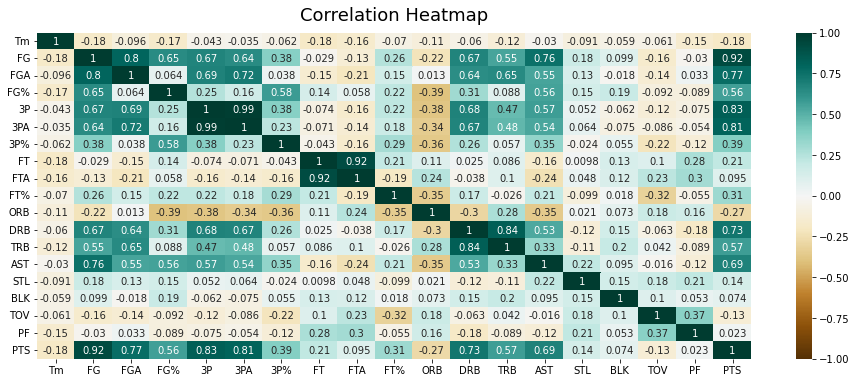

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

dropping the least correlated columns (BLK, STL)

In [ ]:
del df["STL"]
del df["BLK"]

df.head()

,Season,Tm,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,TOV,PF,PTS
0,2009-10,0,38.3,84.1,0.456,5.9,16.9,0.349,17.4,24.0,0.726,11.9,30.7,42.6,20.5,15.0,22.3,100.0
1,2009-10,1,38.3,83.8,0.457,6.5,19.0,0.341,18.5,24.2,0.765,11.9,32.5,44.3,21.1,13.4,19.4,101.7
2,2009-10,2,36.6,80.5,0.455,5.9,17.8,0.332,16.6,22.8,0.730,11.3,30.5,41.8,22.1,15.7,19.3,95.7
3,2009-10,3,38.3,82.4,0.464,6.8,18.3,0.372,18.6,22.8,0.816,10.2,31.5,41.7,23.4,12.9,19.1,102.0
4,2009-10,4,37.4,80.8,0.462,5.1,15.0,0.340,21.7,27.0,0.805,11.7,31.8,43.5,20.0,15.0,21.3,101.5


cool graph

In [ ]:
np.random.seed(1)
# Use the ~10% of the examples as the testing set
# and the remaining ~90% of the examples as the training set.
test_indices = np.random.rand(len(df)) < 0.1
bball_train_dataset = df[~test_indices]
bball_test_dataset = df[test_indices]

print("Training examples: ", len(bball_train_dataset))
# >> Training examples: 350

print("Testing examples: ", len(bball_test_dataset))
# >> Testing examples: 40

Training examples:  350
Testing examples:  40


splitting the data into training + testing

In [ ]:
tf_train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(bball_train_dataset, label=label)
model = tfdf.keras.CartModel()
model.fit(tf_train_dataset)

Use /tmp/tmp73jbphxr as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.628274. Found 350 examples.
Training model...
Model trained in 0:00:00.055358
Compiling model...
Model compiled.


yay basketball training model sports and stuff

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, max_depth=10)

visualizing data 

In [ ]:
model.compile("accuracy")
print("Train evaluation: ", model.evaluate(tf_train_dataset, return_dict=True))
#0.1057

tf_test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(bball_test_dataset, label=label)
print("Test evaluation: ", model.evaluate(tf_test_dataset, return_dict=True))
#0.050

1/1 [==============================] - 0s 349ms/step - loss: 0.0000e+00 - accuracy: 0.1057
Train evaluation:  {'loss': 0.0, 'accuracy': 0.10571428388357162}


1/1 [==============================] - 0s 314ms/step - loss: 0.0000e+00 - accuracy: 0.0500
Test evaluation:  {'loss': 0.0, 'accuracy': 0.05000000074505806}


accuracy time (sports is not accurate)

In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


importing keras tuner

In [ ]:
import keras_tuner as kt

def build_model(hp):
  model = tfdf.keras.CartModel(
      min_examples=hp.Choice("min_examples",
          # Try four possible values for "min_examples" hyperparameter.
          # min_examples=10 would limit the growth of the decision tree,
          # while min_examples=1 would lead to deeper decision trees.
         [1, 2, 5, 10]),
      validation_ratio=hp.Choice("validation_ratio",
         # Three possible values for the "validation_ratio" hyperparameter.
         [0.0, 0.05, 0.10]),
      )
  model.compile("accuracy")
  return model

tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=10,
    directory="/tmp/tuner",
    project_name="tune_cart")

tuner.search(x=tf_train_dataset, validation_data=tf_test_dataset)
best_model = tuner.get_best_models()[0]

print("Best hyperparameters: ", tuner.get_best_hyperparameters()[0].values)
# >> Best hyperparameters:  {'min_examples': 2, 'validation_ratio': 0.0}

Use /tmp/tmperi8ireh as temporary training directory
Best hyperparameters:  {'min_examples': 5, 'validation_ratio': 0.0}


tuning 

In [ ]:
model = tfdf.keras.CartModel(min_examples=2, validation_ratio=0.0)
model.fit(tf_train_dataset)

model.compile("accuracy")
print("Test evaluation: ", model.evaluate(tf_test_dataset, return_dict=True))
# >> Test evaluation:  {'loss': 0.0, 'accuracy': 1.0}

Use /tmp/tmp0q8k3rk7 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.343255. Found 350 examples.
Training model...
Model trained in 0:00:00.037549
Compiling model...
Model compiled.
1/1 [==============================] - 0s 202ms/step - loss: 0.0000e+00 - accuracy: 0.1000
Test evaluation:  {'loss': 0.0, 'accuracy': 0.10000000149011612}


training with optimised hyperparameters that we tuned

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, max_depth=10)

making a hypertuned graph the only time that I plot